In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import os

In [9]:
import cv2

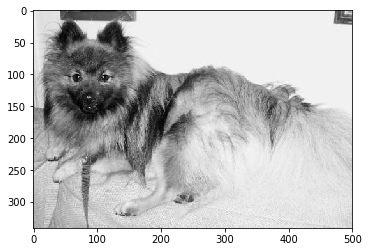

In [10]:
DATADIR = "/home/andy/pegasus/PetImages"
CATEGORIES=['Dog','Cat']

for category in CATEGORIES:
    path =os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [11]:
print (img_array)

[[235 236 235 ... 230 236 238]
 [235 236 235 ... 202 209 214]
 [235 236 235 ... 163 166 170]
 ...
 [165 166 167 ... 214 214 220]
 [160 163 164 ... 216 215 220]
 [164 169 170 ... 207 210 217]]


In [7]:
img_array.shape

(341, 500)

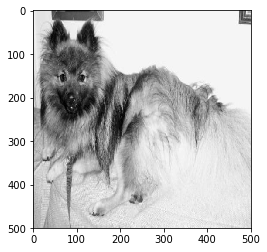

(500, 500)

In [13]:
IMG_SIZE=500
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()
new_array.shape

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path =os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array =cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()
        
        

In [ ]:
print (len(training_data))

In [16]:
import random
random.shuffle(training_data)

In [17]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
1
1
1
1
1
1


In [18]:
X=[]
y=[]


In [19]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D


model=Sequential()
model.add(Conv2D((64),(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D((64),(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

model.fit(X,y,batch_size=32,validation_split=0.1)



Train on 22451 samples, validate on 2495 samples
Epoch 1/1


array([[[ 87],
        [ 70],
        [ 85],
        ...,
        [ 96],
        [ 72],
        [ 72]],

       [[ 84],
        [ 74],
        [ 80],
        ...,
        [ 95],
        [ 72],
        [ 71]],

       [[ 81],
        [ 79],
        [ 77],
        ...,
        [ 95],
        [ 70],
        [ 68]],

       ...,

       [[249],
        [249],
        [249],
        ...,
        [179],
        [179],
        [180]],

       [[249],
        [250],
        [250],
        ...,
        [185],
        [183],
        [183]],

       [[249],
        [250],
        [250],
        ...,
        [185],
        [183],
        [183]]], dtype=uint8)